<a href="https://colab.research.google.com/github/z3r0st/TF-201711448-20181C074-202021767/blob/main/Basauri_aporte_Hito3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def reescalado(val,rangeMin, rangeMax):
  rangeReal = rangeMax - rangeMin
  val += 1
  return rangeMin + ((rangeReal*val)/2.0)

In [ ]:
reescalado(-0.5,1,100)

25.75

In [1]:
import heapq as hq
import math

In [82]:
def __path(path, s, t):
  i = t
  route = [i]
  while i!=s:
    route.append(path[i])
    i = path[i]
    if path[i] == -1 and i != s:
      return []
  route.reverse()
  return route

In [83]:
def dijkstra(G, s, t = None):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
            f = g + w
            if f < cost[v]:
              cost[v] = f
              path[v] = u
              hq.heappush(pqueue, (f, v))
  if t:
    return [__path(path, s, t), cost[t]]
  else: 
    return path, cost

In [105]:
def remove_edge(G, n_from, n_to):
  cost = None
  for i in range(len(G[n_from])):
    if G[n_from][i][0] == n_to:
      #print(n_from, n_to, G[n_from][i][1])
      cost = G[n_from][i][1]
      if cost == math.inf:
        return -1
      else:
        #print("remove")
        G[n_from][i][1] = math.inf
        return cost

In [106]:
def append_edge(G, n_from, n_to, cost):
  for i in range(len(G[n_from])):
    if G[n_from][i][0] == n_to:
      G[n_from][i][1] = cost
      return

In [107]:
def YenKSP(G, init, end, K):
  global_path,costs = dijkstra(G, init)
  A = [{
      'cost': costs[end],
      'path': __path(global_path, init, end)
  }]
  B = []

  if A[0]['path'] == []: return A

  for k in range(1, K):    
    temp_removed = []
    for i in range(0, len(A[k-1]['path'])-1):
      spurNode = A[k -1]['path'][i]
      rootPath = A[k -1]['path'][:i+1]

      for p in A:
        if rootPath == p['path'][:i+1] and len(p['path']) > i:
          cost = remove_edge(G,p['path'][i],p['path'][i+1])
          if cost != -1:
            #continue
            #print("append")
            temp_removed.append([p['path'][i],p['path'][i+1],cost])
          #temp_removed.append([p['path'][i],p['path'][i+1],cost]) #swap
      
      spurPath = dijkstra(G, spurNode, end)

      validate = True

      for p in A:
        if all(j in spurPath[0] for j in p):
          validate = False

      if spurPath != [] and validate == True:
        totalPath = rootPath[:-1] + spurPath[0]
        totalCost = costs[spurNode] + spurPath[1]
        candidate = {'cost': totalCost, 'path': totalPath}

        if not (candidate in B) and not (candidate in A):
          B.append(candidate)
    
    #print(temp_removed)
    for temp in temp_removed:
      #print(G)
      append_edge(G, temp[0], temp[1], temp[2])
      #print(G)
      #print("---------------")
      #print(temp[0], temp[1], temp[2])
    if len(B) == 0:
      break
    B = sorted(B, key = lambda d: d['cost'])
    A.append(B.pop(0))
  return A

In [ ]:
list_listo = [1,2,3,4,5,6,7]
listita = [1,2,3,5]
if all(i in list_listo for i in listita):
  print("a")

a


#Testing

In [108]:
%%file 0502.al
1 2 3 2 4 9
0 2 2 1 3 2 5 2
1 1 4 2 6 2
0 2 1 2 5 9 7 3
0 9 2 2 7 8
1 2 3 9 6 7
2 2 5 7 7 3
3 3 4 8 6 3

Overwriting 0502.al


In [109]:
with open("0502.al") as f:
  G = []
  for line in f:
    nums = [int(x) for x in line.split()]
    G.append([])
    for i in range(0, len(nums), 2):
      G[-1].append([nums[i], nums[i+1]])

for x in G:
  print(x)

[[1, 2], [3, 2], [4, 9]]
[[0, 2], [2, 1], [3, 2], [5, 2]]
[[1, 1], [4, 2], [6, 2]]
[[0, 2], [1, 2], [5, 9], [7, 3]]
[[0, 9], [2, 2], [7, 8]]
[[1, 2], [3, 9], [6, 7]]
[[2, 2], [5, 7], [7, 3]]
[[3, 3], [4, 8], [6, 3]]


In [ ]:
dijkstra(G,3,6)

[False, False, False, True, False, False, False, False]
[True, False, False, True, False, False, False, False]
[True, True, False, True, False, False, False, False]
[True, True, True, True, False, False, False, False]
[True, True, True, True, False, False, False, True]
[True, True, True, True, False, True, False, True]
[True, True, True, True, True, True, False, True]
[True, True, True, True, True, True, True, True]


[[3, 1, 2, 6], 5]

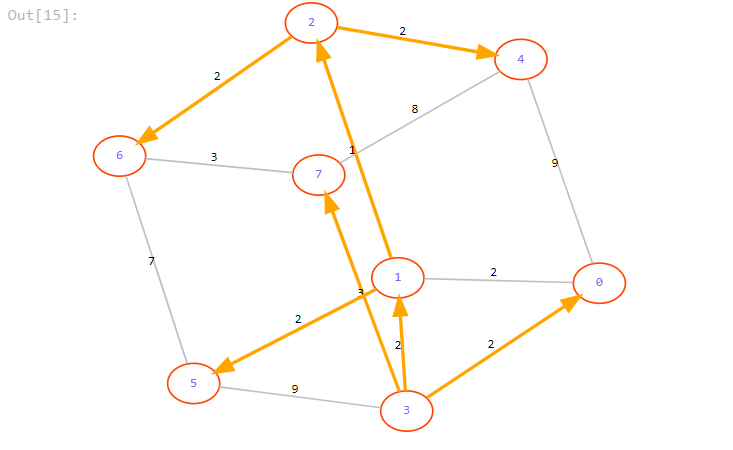

In [89]:
G

[[[1, 2], [3, 2], [4, 9]],
 [[0, 2], [2, 1], [3, 2], [5, 2]],
 [[1, 1], [4, 2], [6, 2]],
 [[0, 2], [1, 2], [5, 9], [7, 3]],
 [[0, 9], [2, 2], [7, 8]],
 [[1, 2], [3, 9], [6, 7]],
 [[2, 2], [5, 7], [7, 3]],
 [[3, 3], [4, 8], [6, 3]]]

In [111]:
YenKSP(G,3,6,3)

[{'cost': 5, 'path': [3, 1, 2, 6]},
 {'cost': 6, 'path': [3, 7, 6]},
 {'cost': 7, 'path': [3, 0, 1, 2, 6]}]

In [114]:
YenKSP(G,3,4,3)

[{'cost': 5, 'path': [3, 1, 2, 4]},
 {'cost': 7, 'path': [3, 0, 1, 2, 4]},
 {'cost': 10, 'path': [3, 7, 6, 2, 4]}]

In [24]:
spurPath = [[0, 3, 1, 2, 4],[]]
validate = True
A = [[3, 1, 2, 4],[3, 0, 1, 2, 4]]
for p in A:
  if all(j in spurPath[0] for j in p):
    validate = False

print(validate)

False


In [143]:
import requests

In [144]:
url = "https://raw.githubusercontent.com/z3r0st/TF-201711448-20181C074-202021767/main/SF_street_intersections.csv"
file = requests.get(url).content
f = file.decode('utf-8')

data = f.split(sep='\n')[1:]
intercepts = dict()
streets = dict()
nodes = dict()
nodeToIntercept = dict()
c = 0
for line in data:
    if(len(line) == 0):
        continue
    street, point = line.split(sep=',')[1:3]
    lon, lat = point[7:-2].split()
    intercept = (float(lat), float(lon))
    if street in intercepts.keys():
        intercepts[street].append(intercept)
    else:
        intercepts[street] = [intercept]
    if intercept in streets.keys():
        streets[intercept].append(street)
    else:
        streets[intercept] = [street]
        nodes[intercept] = c
        nodeToIntercept[c] = intercept
        c += 1

In [145]:
def toRadians(valor):
  return (math.pi/180.0)*valor

In [146]:
def calculateDistance(intercept1, intecerpt2):
  Lat1, Lon1 = intercept1
  Lat2, Lon2 = intecerpt2
  difLat = toRadians(Lat2 - Lat1)
  difLon = toRadians(Lon2 - Lon1)

  a = math.sin(difLat/2)**2 + math.cos(toRadians(Lat1))*math.cos(toRadians(Lat2))*(math.sin(difLon/2))**2
  c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a))

  return  6371000.0*c

In [147]:
def createGraph(streets, intercepts, nodes):
    G = [[] for i in range(len(streets.keys()))]
    
    for intercept in streets.keys():
        for street in streets[intercept]:
            neighbours = []
            for point in intercepts[street]:
                if point != intercept:
                    neighbours.append([point, calculateDistance(intercept, point)])
            
            if len(neighbours) > 1:
                neighbours.sort(key=lambda ls: ls[1])
                neighbours = neighbours[0:2]
                if calculateDistance(neighbours[0][0], neighbours[1][0]) < neighbours[1][1]:
                    neighbours.pop()
                
                G[nodes[intercept]].extend([[nodes[neighbours[x][0]], neighbours[x][1]] for x in range(len(neighbours))])
                
            elif len(neighbours) > 0:
                G[nodes[intercept]].append([nodes[neighbours[0][0]], neighbours[0][1]])
    
    return G

In [148]:
G_al = createGraph(streets, intercepts, nodes)

In [149]:
f = open("weighted_graph.al", "w")
f.write(str(len(G_al))+'\n')
c = 0
for line in G_al:
    f.write(str(c)+' ')
    if len(line) > 0:
        for x, y in line:
            f.write(str(x)+','+str(y)+' ')
    else:
        f.write('-')
    f.write('\n')
    c += 1

In [150]:
with open("weighted_graph.al", "r") as f:
    n = int(f.readline().strip())
    G = [[] for _ in range(n)]
    
    for line in f:
        line = line.strip().split()
        u = int(line[0])
        for pair in line[1:]:
            G[u].append([int(v), float(w)] for v, w in pair.split(sep=','))

In [124]:
pip install perlin_noise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

In [152]:
noise = PerlinNoise(octaves=3.5, seed=777)

In [153]:
def timeFactor(time):
    timeToTraffic = [(1, 1.5), (1, 1.3), (1, 1.1), (1, 1.2), (1, 1.5), (1, 2), (1.1, 3.2), (1.5, 5.5), 
               (1.3, 4), (1, 2.5), (1, 2), (1.1, 2.8), (1.3, 4), (1.4, 4.1), (1.1, 3), (1.1, 2.5), 
               (1.1, 2.6), (1.3, 4), (1.5, 5.2), (1.5, 5.5), (1.1, 4.4), (1, 2.2), (1, 2), (1, 1.6)]
    
    return timeToTraffic[int(time[:2])]

In [154]:
def addTraffic(G, nodeToIntercept, time):
    tMin, tMax = timeFactor(time)
    for u in range(len(G)):
        for i in range(len(G[u])):
            v, w = G[u][i]
            lat, lon = map(lambda c1, c2: 10*(c1+c2)/2, nodeToIntercept[u], nodeToIntercept[v])
            zoneFactor = noise([lat, lon]) + 0.707
            def linearRescale(x, l, r):
                return x*(r - l)/(0.707 - -0.707) # E [-0.707, 0.707]
            zoneFactor = linearRescale(zoneFactor, tMin, tMax)
            # convert to int because < 1m is a negligible value
            G[u][i][1] = int(w * (tMin + zoneFactor))

In [155]:
addTraffic(G_al, nodeToIntercept, "19:38:29")

In [156]:
YenKSP(G_al,0,4294,3)

[{'cost': 1437, 'path': [0, 4872, 329, 616, 4906, 4294]},
 {'cost': 1579, 'path': [0, 2454, 8573, 8310, 4785, 4294]},
 {'cost': 2184, 'path': [0, 2454, 8573, 8310, 4785, 5857, 7763, 1832, 4294]}]

In [142]:
source = 4906
sink = 4294
for intercept in G_al[source]:
  if intercept[0] == sink:
    print(intercept[1])
    break

72
